## Importing Helper Functions 

In [1]:
import pandas as pd
import scipy.stats as stats
from helper_functions import *
from math import sqrt
import seaborn as sns

conn= sqlite3.connect("../Data/im.db")
sql_query = """
SELECT name FROM sqlite_master  
WHERE type='table'
;"""

pd.read_sql(sql_query,conn)


#movi_basics table
q = """
SELECT *
FROM movie_basics
"""
movie_basics_df=pd.read_sql(q, conn)


In [2]:
df = get_clean_df()

In [3]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,...,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,clean_domestic_gross,clean_worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,42.0,"Jan 10, 2014",70000000.0,18848538.0,58953319.0,NaN,NaN,NaN,18848538.0,58953319.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,38.0,"Sep 27, 2013",8500000.0,21569509.0,22885836.0,NaN,NaN,NaN,21569509.0,22885836.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,15.0,"Sep 23, 2011",50000000.0,75605492.0,111300835.0,NaN,NaN,NaN,75605492.0,111300835.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,61.0,"Oct 15, 2010",50000000.0,32746941.0,108660270.0,NaN,NaN,NaN,32746941.0,108660270.0
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,44.0,"Mar 16, 2012",42000000.0,138447667.0,202812429.0,NaN,NaN,NaN,138447667.0,202812429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,tt0975645,6.8,68315,Hitchcock,Hitchcock,2012,98.0,"Biography,Comedy,Drama",12,hitchcock,...,NaN,NaN,NaN,NaN,NaN,FoxS,6000000.0,17600000.0,6000000.0,6000000.0
1054,tt2055765,5.8,11145,The English Teacher,The English Teacher,2013,93.0,"Comedy,Drama",19,theenglishteacher,...,NaN,NaN,NaN,NaN,NaN,Cdgm.,105000.0,NaN,105000.0,105000.0
1056,tt2132285,5.6,77726,The Bling Ring,The Bling Ring,2013,90.0,"Biography,Crime,Drama",1,theblingring,...,NaN,NaN,NaN,NaN,NaN,A24,5800000.0,13300000.0,5800000.0,5800000.0
1059,tt2463288,6.0,48134,Walk of Shame,Walk of Shame,2014,95.0,Comedy,12,walkofshame,...,NaN,NaN,NaN,NaN,NaN,FCW,59200.0,NaN,59200.0,59200.0


# Goal- Group by Genres

group by genres to look at distribution of domestic gross. Filtering by the last 10 years to get recent data. Narrowing time in theatres to days in order to standardize

In [4]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,...,id,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,clean_domestic_gross,clean_worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,42.0,"Jan 10, 2014",70000000.0,18848538.0,58953319.0,NaN,NaN,NaN,18848538.0,58953319.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,38.0,"Sep 27, 2013",8500000.0,21569509.0,22885836.0,NaN,NaN,NaN,21569509.0,22885836.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,15.0,"Sep 23, 2011",50000000.0,75605492.0,111300835.0,NaN,NaN,NaN,75605492.0,111300835.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,61.0,"Oct 15, 2010",50000000.0,32746941.0,108660270.0,NaN,NaN,NaN,32746941.0,108660270.0
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,44.0,"Mar 16, 2012",42000000.0,138447667.0,202812429.0,NaN,NaN,NaN,138447667.0,202812429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,tt0975645,6.8,68315,Hitchcock,Hitchcock,2012,98.0,"Biography,Comedy,Drama",12,hitchcock,...,NaN,NaN,NaN,NaN,NaN,FoxS,6000000.0,17600000.0,6000000.0,6000000.0
1054,tt2055765,5.8,11145,The English Teacher,The English Teacher,2013,93.0,"Comedy,Drama",19,theenglishteacher,...,NaN,NaN,NaN,NaN,NaN,Cdgm.,105000.0,NaN,105000.0,105000.0
1056,tt2132285,5.6,77726,The Bling Ring,The Bling Ring,2013,90.0,"Biography,Crime,Drama",1,theblingring,...,NaN,NaN,NaN,NaN,NaN,A24,5800000.0,13300000.0,5800000.0,5800000.0
1059,tt2463288,6.0,48134,Walk of Shame,Walk of Shame,2014,95.0,Comedy,12,walkofshame,...,NaN,NaN,NaN,NaN,NaN,FCW,59200.0,NaN,59200.0,59200.0


In [5]:
df[["clean_domestic_gross", "domestic_gross_movie_gross", "domestic_gross_movie_budgets"]]

,clean_domestic_gross,domestic_gross_movie_gross,domestic_gross_movie_budgets
0,18848538.0,NaN,18848538.0
1,21569509.0,NaN,21569509.0
2,75605492.0,NaN,75605492.0
3,32746941.0,NaN,32746941.0
4,138447667.0,NaN,138447667.0
...,...,...,...
1050,6000000.0,6000000.0,NaN
1054,105000.0,105000.0,NaN
1056,5800000.0,5800000.0,NaN
1059,59200.0,59200.0,NaN


In [6]:
df["domestic_gross"] = df["domestic_gross_movie_budgets"].replace('[$,()]', '', regex=True).astype(float)
df["domestic_gross"]

0        18848538.0
1        21569509.0
2        75605492.0
3        32746941.0
4       138447667.0
           ...     
1050            NaN
1054            NaN
1056            NaN
1059            NaN
1061            NaN
Name: domestic_gross, Length: 1385, dtype: float64

In [7]:
#makes days in theatre column
#df['theater_date'] = pd.to_datetime(df['theater_date'])
#df['dvd_date'] = pd.to_datetime(df['dvd_date'])
#df['days_in_theater'] = df['dvd_date'] - df['theater_date']
#df['days_in_theater'] = df['days_in_theater'].dt.days #dt.dats converts timedelta to float
#df['box_office_perday'] = df['domestic_gross'] / df['days_in_theater']
#gets what year the movie was released
#df['release_year'] = df['theater_date'].dt.year

In [8]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,...,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,clean_domestic_gross,clean_worldwide_gross,domestic_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,"Jan 10, 2014",70000000.0,18848538.0,58953319.0,NaN,NaN,NaN,18848538.0,58953319.0,18848538.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,"Sep 27, 2013",8500000.0,21569509.0,22885836.0,NaN,NaN,NaN,21569509.0,22885836.0,21569509.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,"Sep 23, 2011",50000000.0,75605492.0,111300835.0,NaN,NaN,NaN,75605492.0,111300835.0,75605492.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,"Oct 15, 2010",50000000.0,32746941.0,108660270.0,NaN,NaN,NaN,32746941.0,108660270.0,32746941.0
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,"Mar 16, 2012",42000000.0,138447667.0,202812429.0,NaN,NaN,NaN,138447667.0,202812429.0,138447667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,tt0975645,6.8,68315,Hitchcock,Hitchcock,2012,98.0,"Biography,Comedy,Drama",12,hitchcock,...,NaN,NaN,NaN,NaN,FoxS,6000000.0,17600000.0,6000000.0,6000000.0,NaN
1054,tt2055765,5.8,11145,The English Teacher,The English Teacher,2013,93.0,"Comedy,Drama",19,theenglishteacher,...,NaN,NaN,NaN,NaN,Cdgm.,105000.0,NaN,105000.0,105000.0,NaN
1056,tt2132285,5.6,77726,The Bling Ring,The Bling Ring,2013,90.0,"Biography,Crime,Drama",1,theblingring,...,NaN,NaN,NaN,NaN,A24,5800000.0,13300000.0,5800000.0,5800000.0,NaN
1059,tt2463288,6.0,48134,Walk of Shame,Walk of Shame,2014,95.0,Comedy,12,walkofshame,...,NaN,NaN,NaN,NaN,FCW,59200.0,NaN,59200.0,59200.0,NaN


## We need this data to be normal so that we can run statistical tests on it in order to show relationships


### Cannot proceed with grouping by genre until the gross income data is normal

#### Creating graphs to eye-ball the distribution using seaborn

##### Bar chart

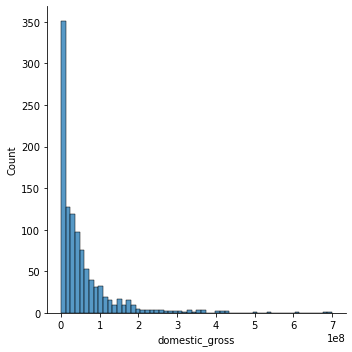

In [9]:
#testing the distribution 
import seaborn as sns
sns.displot(df['domestic_gross'])

#### very skewed distribution

most of the movies made made less than $1,000,000. Only a few made over 2mil. This makes sense because only a few can be block busters.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1061
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   movie_id                       1385 non-null   object 
 1   averagerating                  1385 non-null   float64
 2   numvotes                       1385 non-null   int64  
 3   primary_title                  1385 non-null   object 
 4   original_title                 1385 non-null   object 
 5   year                           1385 non-null   int64  
 6   runtime_minutes                1380 non-null   float64
 7   genres                         1384 non-null   object 
 8   ordering                       1385 non-null   int64  
 9   title                          1385 non-null   object 
 10  region                         1385 non-null   object 
 11  language                       22 non-null     object 
 12  types                          555 non-null    o

##### Histogram

<AxesSubplot:xlabel='domestic_gross', ylabel='Count'>

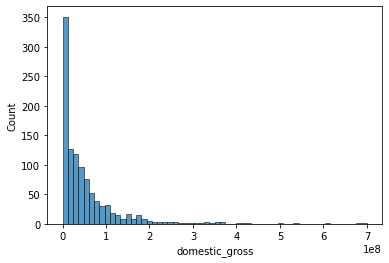

In [11]:
sns.histplot(df['domestic_gross'])

Checked to see if making it a histogram would show any changes in the distribution. It did not.

##### Box Plot

C:\Users\hopmiller\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='domestic_gross'>

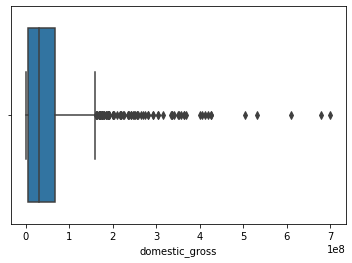

In [12]:
sns.boxplot(df['domestic_gross'])

Shows the same results are the previous data.

In [13]:
df["domestic_gross"].mean()

54408431.03451493

The mean of the df is not reflective of what most movies made due to the high gross income the block-busters made.

In [14]:
#Filtering for movies that made less than $1.5 mil ---> hoping this will be more normalized
df_filtered_gross= df[df["domestic_gross"]<150000000]
df_filtered_gross

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,...,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,clean_domestic_gross,clean_worldwide_gross,domestic_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,"Jan 10, 2014",70000000.0,18848538.0,58953319.0,NaN,NaN,NaN,18848538.0,58953319.0,18848538.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,"Sep 27, 2013",8500000.0,21569509.0,22885836.0,NaN,NaN,NaN,21569509.0,22885836.0,21569509.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,"Sep 23, 2011",50000000.0,75605492.0,111300835.0,NaN,NaN,NaN,75605492.0,111300835.0,75605492.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,"Oct 15, 2010",50000000.0,32746941.0,108660270.0,NaN,NaN,NaN,32746941.0,108660270.0,32746941.0
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,"Mar 16, 2012",42000000.0,138447667.0,202812429.0,NaN,NaN,NaN,138447667.0,202812429.0,138447667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,tt2125435,7.3,77440,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93.0,"Adventure,Drama,Fantasy",6,beastsofthesouthernwild,...,"Jun 27, 2012",1800000.0,12795746.0,23265132.0,NaN,NaN,NaN,12795746.0,23265132.0,12795746.0
1067,tt2333784,6.1,156432,The Expendables 3,The Expendables 3,2014,126.0,"Action,Adventure,Thriller",11,theexpendables3,...,"Aug 15, 2014",100000000.0,39322544.0,209461378.0,NaN,NaN,NaN,39322544.0,209461378.0,39322544.0
1068,tt2334871,4.5,29997,Snatched,Snatched,2017,90.0,"Action,Adventure,Comedy",12,snatched,...,"May 12, 2017",42000000.0,45852178.0,57852177.0,NaN,NaN,NaN,45852178.0,57852177.0,45852178.0
1070,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",15,gamenight,...,"Feb 23, 2018",37000000.0,69179066.0,117378084.0,NaN,NaN,NaN,69179066.0,117378084.0,69179066.0


<AxesSubplot:xlabel='domestic_gross', ylabel='Count'>

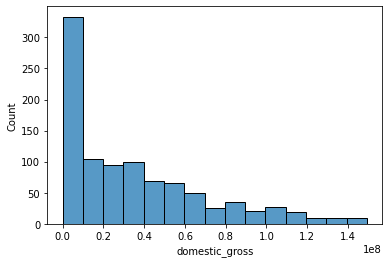

In [15]:
sns.histplot(df_filtered_gross['domestic_gross'])

Still very skewed. Probably cannot use this data for statistic tests due to it not being normal.

In [16]:
df_filtered_gross["domestic_gross"].mean()
#mean= 29,132,181

34654971.51437372

### Conclusion 

We msot likely not going to be able to use gross domestic income in the movies that have come out in the last 10 years grouped by genres. The data was too skewed to be statistically tested. 

Idea: look into why the outlifers(movies with high domestic gross income) have done so well.

## Movies with domestic gross income> $4,000,000

Looking into why certain movie have made so much money- specific reasons?

In [17]:
#Filtering for movies that made more than $4 mil ---> hoping this will be more normalized
df_filtered_gross_2= df[df["domestic_gross"]>4000000]
df_filtered_gross_2

,movie_id,averagerating,numvotes,primary_title,original_title,year,runtime_minutes,genres,ordering,title,...,release_date,production_budget,domestic_gross_movie_budgets,worldwide_gross_movie_budgets,studio,domestic_gross_movie_gross,foreign_gross_movie_gross,clean_domestic_gross,clean_worldwide_gross,domestic_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",20,thelegendofhercules,...,"Jan 10, 2014",70000000.0,18848538.0,58953319.0,NaN,NaN,NaN,18848538.0,58953319.0,18848538.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5,baggageclaim,...,"Sep 27, 2013",8500000.0,21569509.0,22885836.0,NaN,NaN,NaN,21569509.0,22885836.0,21569509.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",14,moneyball,...,"Sep 23, 2011",50000000.0,75605492.0,111300835.0,NaN,NaN,NaN,75605492.0,111300835.0,75605492.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",4,hereafter,...,"Oct 15, 2010",50000000.0,32746941.0,108660270.0,NaN,NaN,NaN,32746941.0,108660270.0,32746941.0
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",26,21jumpstreet,...,"Mar 16, 2012",42000000.0,138447667.0,202812429.0,NaN,NaN,NaN,138447667.0,202812429.0,138447667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,tt2333784,6.1,156432,The Expendables 3,The Expendables 3,2014,126.0,"Action,Adventure,Thriller",11,theexpendables3,...,"Aug 15, 2014",100000000.0,39322544.0,209461378.0,NaN,NaN,NaN,39322544.0,209461378.0,39322544.0
1068,tt2334871,4.5,29997,Snatched,Snatched,2017,90.0,"Action,Adventure,Comedy",12,snatched,...,"May 12, 2017",42000000.0,45852178.0,57852177.0,NaN,NaN,NaN,45852178.0,57852177.0,45852178.0
1069,tt2386490,7.6,60769,How to Train Your Dragon: The Hidden World,How to Train Your Dragon: The Hidden World,2019,104.0,"Action,Adventure,Animation",20,howtotrainyourdragonthehiddenworld,...,"Feb 22, 2019",129000000.0,160791800.0,519258283.0,NaN,NaN,NaN,160791800.0,519258283.0,160791800.0
1070,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",15,gamenight,...,"Feb 23, 2018",37000000.0,69179066.0,117378084.0,NaN,NaN,NaN,69179066.0,117378084.0,69179066.0


#### Histofram of data

<AxesSubplot:xlabel='domestic_gross', ylabel='Count'>

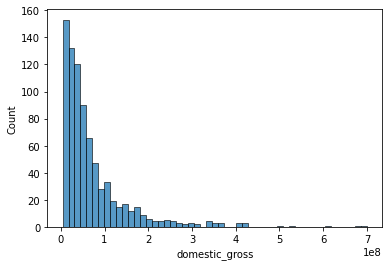

In [18]:
sns.histplot(df_filtered_gross_2['domestic_gross'])

Still skewed but allowed to assume normaility to progress with project

## T-test


Seeing if there is a difference in mean runtime income for movies with income greater than 4 million and movies less than 4 million dollars

In [19]:
x_bar = df_filtered_gross_2['domestic_gross'].mean() # sample mean 
n = len(df_filtered_gross_2['domestic_gross']) # number of students
sigma = df_filtered_gross_2['domestic_gross'].std() # sd of population
mu = df['domestic_gross'].mean() # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

5.92853095179702

### Calculating p-value

In [20]:
stats.norm.cdf(z)

0.999999998471716

this means that the average gross domestic income of the filtered set of movies(income greater than $4mil) is higher than 99.9% of the population of domestic movies in general

## Domestic vs World Wide Gross

### Scatterplot

<AxesSubplot:xlabel='domestic_gross_movie_budgets', ylabel='worldwide_gross_movie_budgets'>

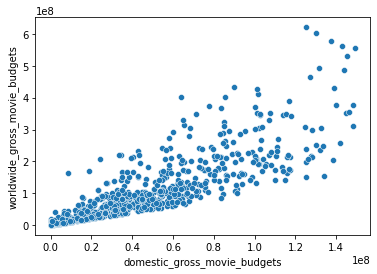

In [21]:
sns.scatterplot(x='domestic_gross_movie_budgets',y='worldwide_gross_movie_budgets', data=df_filtered_gross)

There is a strong positive correlation between international and domestic gross revenues. 

Result: we are able to use either df_filtered_gross or worldwide_gross_movie_budgets in data when making reccomendations.